## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# read csv file and investigate columns
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
# Exploring number of Rows and Columns in the dataset

df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# Unique users in the data set
users_unique = df['user_id'].nunique()
print(users_unique)

# Checking any null values in the data set
df.isnull().sum()

290584


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

d. The proportion of users converted.

In [6]:
# Propotion of users converted
convert_prop = df['converted'].sum()/df.shape[0]

print(convert_prop)

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Adding the length of the 2 possible instance where the new_page and treatment don't line up
len(df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')])+len(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')])


3893

f. Do any of the rows have missing values?

In [8]:
# checking for null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Identifying Treatment & old page combination via query 

treatment_oldpage = df.query("group == 'treatment' & landing_page == 'old_page'")
control_newpage   = df.query("group == 'control' & landing_page == 'new_page'")

# dropping each of the above from the dataset

df1 = df.drop(treatment_oldpage.index)
df2 = df1.drop(control_newpage .index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Identify unique values for user_ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Identifying the duplicated user ID and corrsponding row
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# as 2b

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# dropping user_id duplicate by using drop_dulicates command
df2.drop_duplicates(subset='user_id', keep="first" , inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Probability of converting is number of converted divided by length of the data frame
df2['converted'].sum()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [48]:
# Control group convertion probility
p_control_converted = len(df2[(df2['converted']) & (df2['group'] == 'control')])/len(df2[(df2['group'] == 'control')])
print(p_control_converted)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [49]:
# Treatment group convertion probility
p_treatment_converted = len(df2[(df2['converted']) & (df2['group'] == 'treatment')])/len(df2[(df2['group'] == 'treatment')])
print(p_treatment_converted)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
# probility of receiving new page
len(df2[(df2['landing_page'] == 'new_page')])/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

So far the data has shown that no evidence that the new treatment is leading to more conversions. As shown in Question 1d, the conversion rate was about 12% regardless of the group type. This probabilioty has stayed at 12% as per questions 4b and 4c for both control and treatment.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypothesis Null        - H0 : pnew <= pold
Atlernative Hypothesis - H1 : pnew > pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Calculating the Pnew conversion for all ab_data reagrdless of the page, ie : Only conversion need to True

pnew = len(df[(df['converted'] == True)])/df.shape[0]
print("Pnew under the null is:" , pnew)

Pnew under the null is: 0.11965919355605512


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
pold = pnew
print("Pnew under the null is:" , pold)

Pnew under the null is: 0.11965919355605512


c. What is $n_{new}$?

In [21]:
# n new correspond to the "treatment" part of the data

n_new = df2[df2.group=='treatment'].user_id.count()
print("nnew is :", n_new)

nnew is : 145310


d. What is $n_{old}$?

In [22]:
# n new correspond to the "control" part of the data
n_old = df2[df2.group=='control'].user_id.count()
print("nold is:", n_old)

nold is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [59]:
# np ramdon choice used to calculate the New Page Converted 

new_page_converted = np.random.choice([0,1],n_new, p=(pnew, 1-pnew))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# np ramdon choice used to calculate the Old Page Converted 

old_page_converted = np.random.choice([0,1],n_old, p=(pold,1-pold))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [46]:
# Findinf Pnew -Pold based on calcualted old and new converted page in (e) and (f) above
pnew_pold = new_page_converted.mean() - old_page_converted.mean()

print(pnew_pold)


-0.00029054167554365407


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# creating empty p_diffs array
p_diffs = []

# Simulate for 10,000 iteration

for _ in range(10000):
    # creating new and old page converted via random.choice
    new_page_converted = np.random.choice ([0,1], size=n_new, p=(pnew, 1-pnew))
    old_page_converted = np.random.choice ([0,1], size=n_old, p=(pold,1-pold))
    # calculating difference of new_page and old_page mean
    diff = new_page_converted.mean() - old_page_converted.mean()
    
    # Append diff into the created p_diff 
    p_diffs.append(diff)
    
# p_diffs into array    
p_diffs = np.array(p_diffs)
    


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

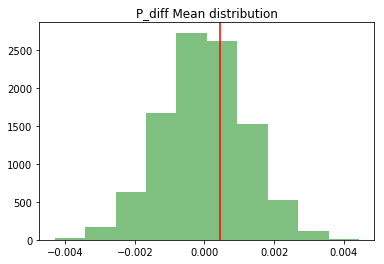

In [27]:
# Plotting mean difference Histogram
plt.hist(p_diffs , alpha=0.5 , color='g');

# represent the diff in mean via red line though the histogram
plt.axvline(diff, c='red');

plt.title('P_diff Mean distribution');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [55]:
# difference observed in Part I 
pdiff = p_control_converted - p_treatment_converted

# Propotion the difference between P_diff and the actual mean
(p_diffs > pdiff).mean()

0.0015782389853555567


0.0944

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?



The Pvalue has been computed.
The actual sample mean ("pdiff" in our example above) has been compared to the P_diff_mean ditribution, to observe if the sample mean have come from the ditribution.
In the case above the sample mean is within the ditribution, meaning that is has come from the Null Hyptothesis value.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [53]:
# Importing the library 
import statsmodels.api as sm

# Calcule the number Old and New convertion associated with Old and New Page
convert_old = df2.query("converted == True & landing_page == 'old_page'").shape[0]
convert_new = df2.query("converted == True & landing_page == 'new_page'").shape[0]

#Calculating the number of rows assosciated with old and new page
n_old = df2[(df2['landing_page'] == 'old_page')].shape[0] 
n_new = df2[(df2['landing_page'] == 'new_page')].shape[0] 

convert_old,convert_new,n_old,n_new


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [52]:
# Using ztest to compute the test statistic and pvalue

z_s, p_v = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger' )

print(z_s,p_v)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

p_v = 0.91 >0.05 , therefore the Null Hyptohesis is True , so in this case the new_page did not convert more than old_page.
This match with the findings in J and K part of the question.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# Creating Intercept column
df2['intercept'] = 1

# Converting ab_page to 0 and 1
df2['ab_page'] = (df2.group == 'treatment').astype(int)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
# Fitting the model with 2 columns intercept and ab_page
model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Fit the model and extract the summary
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        05:49:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value assosciate with ab_page = 0.190 
The reason of the difference is that the logistic regression used in Part III has a two-tailed test for the coefficient of ab_page,H0 : coef of ab_page = 0 & H1: coef of ab_page not = 0. While in Part II the Hypthesis was 
H0 : pnew <= pold & H1 : pnew > pold

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other factors to the regression will help better understand if other factors may influence the conversion rate of new_page example such as country the site is being accessed, users age group or any other users classification.
Some disadvantage may come from high correlation between the additional terms added to the regression model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# Reading the contries csv file
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# discovering df_new
df_new.head()
#review and group by countries
df_new.groupby('country').count()


,timestamp,group,landing_page,converted,intercept,ab_page
country,,,,,,
CA,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619


In [35]:
#Create the dummy variables associated with the contry
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

# drop the US column in order to have 2 columns associated with the country
df_new = df_new.drop('US', axis=1)

# Create Intercept column
df_new['intercept'] = 1

# Fitting the model with 3 columns intercept and Canada and UK
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])

# Fit the model and extract the summary
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 Aug 2019   Pseudo R-squ.:               1.521e-05
Time:                        05:49:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

The pvalue for CANADA and UK are 0.129 and 0.456 respectively. This indicate that countries do not have any factors on conversaion as both pvalues are >0.05, therefore H0 is True.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
# creating the intercept columns and converting ab_page to 0 and 1.
df_new['intercept'] = 1
df_new['ab_page'] = (df_new.group == 'treatment').astype(int)
df_new['UK_ind_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['CA_ind_ab_page'] = df_new['CA']*df_new['ab_page']

# Fitting the logsitic regression model with columns related to country and page
logit_h = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA', 'UK_ind_ab_page', 'CA_ind_ab_page']])

# Fit the model and extract the summary
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 Aug 2019   Pseudo R-squ.:               2.323e-05
Time:                        06:34:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

The pvalue results confirm with previously calcaulted pvalue above , that page and country have no direct factors on conversion. All p values are >0.005.


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.